## Data Preprocessing

In [1]:
import pandas as pd
# read data from text files
data = pd.read_table('flight_edges.tsv',header=2)   
# create feature names(11 features)
data.columns = ['Origin','Destination','Origin City', 'Destination City', 'Passengers', 'Seats', 'Flights', 'Distance','Fly Date', 'Origin Population', 'Destination Population']

In [2]:
# use matplotlib.pyplot to do plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606800 entries, 0 to 3606799
Data columns (total 11 columns):
Origin                    object
Destination               object
Origin City               object
Destination City          object
Passengers                int64
Seats                     int64
Flights                   int64
Distance                  float64
Fly Date                  int64
Origin Population         int64
Destination Population    int64
dtypes: float64(1), int64(6), object(4)
memory usage: 302.7+ MB


In [4]:
# check any Null values in the column features
data.isnull().any()
# check negative values
data[data < 0].count()

Origin                    0
Destination               0
Origin City               0
Destination City          0
Passengers                0
Seats                     0
Flights                   0
Distance                  0
Fly Date                  0
Origin Population         0
Destination Population    0
dtype: int64

In [190]:
import _pickle as cPickle
f=open ('myfile.dat','wb') # write-binary mode
cPickle.dump(data, f)
f.close()

In [5]:
data.head(5)

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population
0,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103.0,199010,284093,76034
1,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156.0,199002,147300,76034
2,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156.0,199003,147300,76034
3,MFR,RDM,"Medford, OR","Bend, OR",2,72,4,156.0,199001,147300,76034
4,MFR,RDM,"Medford, OR","Bend, OR",7,18,1,156.0,199009,147300,76034


In [6]:
# convert dateframe of Fly Date
import datetime
data['Fly Date'] = data['Fly Date'].apply(str)
data['Fly Year']=data['Fly Date'].apply(lambda x: str(x)[:4])
data['Fly Month']=data['Fly Date'].apply(lambda x: str(x)[4:6])

In [7]:
data1 = data

##  relations of population and flights

In [96]:
dict90 = {}
data1990 = data[data['Fly Year'] == '1990']
for destination, population in zip(data1990['Destination City'], data1990['Destination Population']):
    if destination not in dict90:
        if population >= 250000:
            dict90[destination] = population
print (len(dict90))

126


In [70]:
dict09 = {}
data2009 = data[data['Fly Year'] == '2009']
for destination, population in zip(data2009['Destination City'], data2009['Destination Population']):
    if destination not in dict09:
        dict09[destination] = population
print (len(dict09))

408


In [121]:
ratePopulation = {}
for city in dict90:
    if city in dict09:
        ratePopulation[city] = (1.0 * (dict09[city] - dict90[city]) / dict90[city]/19)*100

In [122]:
s = [(k, ratePopulation[k]) for k in 
     sorted(ratePopulation, key=ratePopulation.get, reverse=True)]
s[:10]


[('Las Vegas, NV', 8.008996836794543),
 ('Raleigh, NC', 5.545089124138255),
 ('Austin, TX', 5.286899119470954),
 ('Phoenix, AZ', 4.9643176828283),
 ('Atlanta, GA', 4.069483628413728),
 ('Charlotte, NC', 3.6577099591035833),
 ('Orlando, FL', 3.5819537585929857),
 ('Reno, NV', 3.261316209332412),
 ('Dallas, TX', 3.2001811430718514),
 ('Houston, TX', 2.886097295969976)]

In [123]:
s[-10:]

[('Charleston, WV', -0.0559043634844885),
 ('Dayton, OH', -0.059799832258884605),
 ('Flint, MI', -0.08531583465310145),
 ('Syracuse, NY', -0.12269470056120037),
 ('Scranton, PA', -0.23925647714655818),
 ('Pittsburgh, PA', -0.24244210710518663),
 ('Buffalo, NY', -0.29341625227978013),
 ('New Orleans, LA', -0.3052927139091546),
 ('Binghamton, NY', -0.3956926550993071),
 ('Youngstown, OH', -0.43592047105272164)]

In [124]:
x_p = ['Las Vegas, NV','Raleigh, NC','Austin, TX','Phoenix, AZ','Atlanta, GA','Charlotte, NC',
         'Orlando, FL', 'Reno, NV', 'Dallas, TX', 'Houston, TX']
x_r = [8.008996836794543, 5.545089124138255, 5.286899119470954, 4.9643176828283, 4.069483628413728,
         3.6577099591035833, 3.5819537585929857, 3.261316209332412, 3.2001811430718514,2.886097295969976]

In [125]:
y_p = ['Charleston, WV', 'Dayton, OH','Flint, MI','Syracuse, NY','Scranton, PA','Pittsburgh, PA', 
    'Buffalo, NY','New Orleans, LA', 'Binghamton, NY','Youngstown, OH']
y_r = [ -0.0559043634844885, -0.059799832258884605, -0.08531583465310145,-0.12269470056120037,
       -0.23925647714655818, -0.24244210710518663, -0.29341625227978013, -0.3052927139091546,
       -0.3956926550993071, -0.43592047105272164]

In [130]:
import plotly.plotly as py
plotly.tools.set_credentials_file(username='hua_hua', api_key='BDTQczbh01PIQigSaQwK')
import plotly.graph_objs as go

data = [
    go.Bar(
        x = x_p,
        y = x_r,
        base = 0,
        marker = dict(
          color = 'rgba(222,45,38,0.8)'
        ),
            name = 'Top 10'
    ),
    go.Bar(
        x = y_p,
        y = y_r,
        base = 0,
        marker = dict(
          color = 'rgb(49,130,189)'
        ),
        name = 'Lowest 10'
    )
]


fig = go.Figure(data=data)
py.iplot(fig, filename='base-bar')

In [204]:
data = data1
lasVagas = {}
lasVegas_pop = []
data_las = data[data['Destination City'] == 'Las Vegas, NV']
for year, population in zip(data_las['Fly Year'], data_las['Destination Population']):
    if year not in lasVagas:
        lasVagas[year] = population
        lasVegas_pop.append(population)
print (len(lasVagas))
newlasVagas = lasVagas.items()
newlasVagas = sorted(newlasVagas)
# newlasVagas
#lasVegas_pop 

20


In [79]:
from collections import defaultdict
popDict = defaultdict(list)
citys = ['Las Vegas, NV', 'Raleigh, NC','Austin, TX','Phoenix, AZ','Atlanta, GA']
years = ['1990', '1999', '2009']
for index, row in data.iterrows():
    if row['Destination City'] in citys:
        if row['Fly Year'] in years and row['Destination Population'] not in popDict[row['Destination City']]:
            popDict.setdefault(row['Destination City'],[]).append(row['Destination Population'])
        #popDict[row['Destination City']] = row['Destination Population']
    #volumnDict.setdefault(row['street'],list([])).append((row['date'], row['total_count']))
#len(volumnDict)
popDict

defaultdict(list,
            {'Atlanta, GA': [3087755, 3988728, 5475213],
             'Austin, TX': [850619, 1146050, 1705075],
             'Las Vegas, NV': [754581, 1217155, 1902834],
             'Phoenix, AZ': [2245805, 3013696, 4364094],
             'Raleigh, NC': [548230, 743402, 1125827]})

In [106]:
Raleigh = {}
Raleigh_pop = []
data_Raleigh = data[data['Destination City'] == 'Raleigh, NC']
for year, population in zip(data_Raleigh['Fly Year'], data_Raleigh['Destination Population']):
    if year not in Raleigh:
        Raleigh[year] = population
        Raleigh_pop.append(population)
print (len(Raleigh))
newRaleigh = Raleigh.items()
newRaleigh = sorted(newRaleigh)
# newRaleigh

20


In [183]:
Austin = {}
austin_pop = []
data_Austin = data[data['Destination City'] == 'Austin, TX']
for year, population in zip(data_Austin['Fly Year'], data_Austin['Destination Population']):
    if year not in Austin:
        Austin[year] = population
        austin_pop.append(population)
print (len(Austin))
print (austin_pop)
newAustin = Austin.items()
newAustin = sorted(newAustin)
# newAustin

20
[850619, 874516, 901055, 931671, 964803, 1001054, 1036319, 1067953, 1104612, 1146050, 1265715, 1324426, 1353176, 1382693, 1418999, 1464309, 1528958, 1594525, 1654100, 1705075]


In [15]:
Phoenix = {}
phoenix_pop = []
data_Phoenix = data[data['Destination City'] == 'Phoenix, AZ']
for year, population in zip(data_Phoenix['Fly Year'], data_Phoenix['Destination Population']):
    if year not in Phoenix:
        Phoenix[year] = population
        phoenix_pop.append(population)
print (len(Phoenix))
newPhoenix = Phoenix.items()
newPhoenix = sorted(newPhoenix)


20


In [108]:
Atlanta = {}
atlanta_pop = []
data_Atlanta = data[data['Destination City'] == 'Atlanta, GA']
for year, population in zip(data_Atlanta['Fly Year'], data_Atlanta['Destination Population']):
    if year not in Atlanta:
        Atlanta[year] = population
        atlanta_pop.append(population)
print (len(Atlanta))
# print (atlanta_pop)
newAtlanta = Atlanta.items()
newAtlanta = sorted(newAtlanta)
# newAtlanta

20


In [197]:
youngs = {}
youngs_pop = []
data_youngs = data[data['Destination City'] == 'Youngstown, OH']
for year, population in zip(data_youngs['Fly Year'], data_youngs['Destination Population']):
    if year not in youngs:
        youngs[year] = population
        youngs_pop.append(population)
print (len(youngs))
print (youngs_pop)
newYoungs = youngs.items()
newYoungs = sorted(newYoungs)
# newAtlanta

20
[613801, 614503, 615945, 615884, 614108, 611729, 609821, 606685, 603407, 599394, 602171, 598499, 593748, 589856, 585692, 580716, 576344, 571145, 566425, 562963]


In [199]:
data = data1
Binghamton = {}
Binghamton_pop = []
data_Binghamton = data[data['Destination City'] == 'Binghamton, NY']
for year, population in zip(data_Binghamton['Fly Year'], data_Binghamton['Destination Population']):
    if year not in Binghamton:
        Binghamton[year] = population
        Binghamton_pop.append(population)
print (len(Binghamton))
print (Binghamton_pop)
newBinghamton = Binghamton.items()
newBinghamton = sorted(newBinghamton)

20
[264586, 264920, 265293, 264159, 261712, 257231, 253392, 250447, 248959, 247462, 252042, 251448, 251290, 249645, 248337, 246776, 246163, 245380, 244870, 244694]


In [74]:
yearlist = ['1990','1999','2009']
atlanta_data = {}
for year, population in zip(data_Atlanta['Fly Year'], data_Atlanta['Destination Population']):
    if year in yearlist:
        atlanta_data[year] = population
print atlanta_data

{'1999': 3988728, '1990': 3087755, '2009': 5475213}


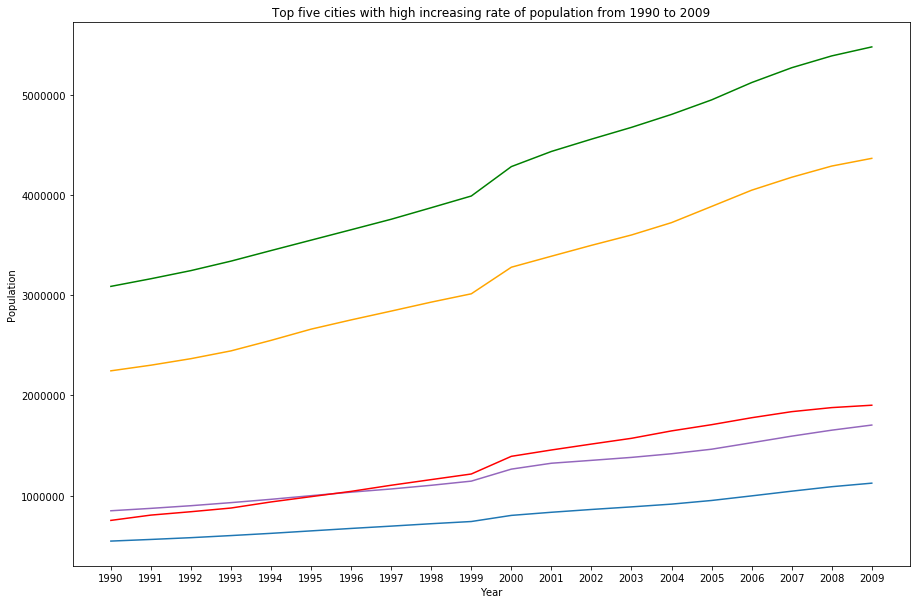

In [27]:
plt.figure(figsize=(15,10))
year = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
        2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
plt.plot(year, atlanta_pop, color='g')
plt.plot(year, phoenix_pop, color='orange')
plt.plot(year, austin_pop, color="#9467bd")
plt.plot(year, Raleigh_pop, color = "#1f77b4")
plt.plot(year, lasVegas_pop, color='red')
plt.xticks([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
        2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Top five cities with high increasing rate of population from 1990 to 2009')

plt.show()

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hua_hua/0 or inside your plot.ly account where it is named 'styled-line'


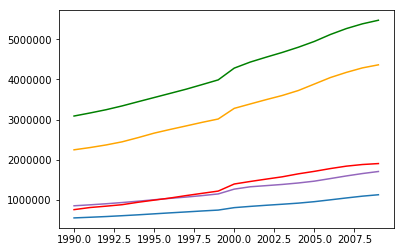

In [25]:
import plotly
plotly.tools.set_credentials_file(username='hua_hua', api_key='BDTQczbh01PIQigSaQwK')

import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

year = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
        2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]

# Create traces
trace0 = go.Scatter(
    x = year,
    y = atlanta_pop,
    mode = 'lines',
    name = 'Atlanta'
)
trace1 = go.Scatter(
    x = year,
    y = phoenix_pop,
    mode = 'lines',
    name = 'Phoenix'
)
trace2 = go.Scatter(
    x = year,
    y = austin_pop,
    mode = 'lines',
    name = 'Austin'
)
trace3 = go.Scatter(
    x = year,
    y = Raleigh_pop,
    mode = 'lines',
    name = 'Raleigh'
)
trace4 = go.Scatter(
    x = year,
    y = lasVegas_pop,
    mode = 'lines',
    name = 'LasVegas'
)

data = [trace0, trace1, trace2, trace3, trace4]

# Edit the layout
layout = dict(title = 'Top five cities with high increasing rate of population from 1990 to 2009',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Population'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [166]:
las_flights = data_las.groupby(['Fly Year'])['Flights'].sum()
las_flights
las_fly = []
for i in las_flights:
    las_fly.append(i)
print (las_fly)
las_fly_r = np.asarray(las_fly) / 69618.
las_fly_r

[69618, 79243, 75824, 82538, 94539, 109471, 116355, 116561, 117590, 124407, 137499, 135950, 134743, 140684, 160455, 171796, 173911, 176527, 164146, 146870]


array([ 1.        ,  1.13825447,  1.08914361,  1.18558419,  1.35796777,
        1.57245253,  1.671335  ,  1.674294  ,  1.68907466,  1.78699474,
        1.97504956,  1.95279956,  1.93546209,  2.02079922,  2.30479186,
        2.46769514,  2.49807521,  2.5356517 ,  2.35780976,  2.10965555])

In [181]:
Austin_flights = data_Austin.groupby(['Fly Year'])['Flights'].sum()
Austin_flights
Austin_fly = []
for i in Austin_flights:
    Austin_fly.append(i)
print (Austin_fly)
Austin_fly_r = np.asarray(Austin_fly) / 28323.
Austin_fly_r

[28323, 29244, 28944, 30069, 32839, 34832, 35902, 35973, 38012, 42529, 42150, 42180, 40311, 45016, 46651, 47123, 48573, 52776, 50749, 43980]


array([ 1.        ,  1.03251774,  1.02192564,  1.06164601,  1.15944639,
        1.22981323,  1.26759171,  1.27009851,  1.34208947,  1.50157116,
        1.48818981,  1.48924902,  1.42326025,  1.58937966,  1.64710659,
        1.66377149,  1.71496663,  1.86336193,  1.79179465,  1.55280161])

In [196]:
youngs_flights = data_youngs.groupby(['Fly Year'])['Flights'].sum()
_flights = data_youngs.groupby(['Fly Year'])['Flights'].sum()
youngs_flights
youngs_fly = []
for i in youngs_flights:
    youngs_fly.append(i)
print (youngs_fly)
youngs_fly_r = np.asarray(youngs_fly) / 851.
youngs_fly_r


[851, 938, 961, 872, 688, 1472, 2666, 3184, 1961, 1965, 884, 663, 544, 145, 336, 200, 179, 234, 219, 168]


array([ 1.        ,  1.10223267,  1.12925969,  1.02467685,  0.80846063,
        1.72972973,  3.13278496,  3.74148061,  2.30434783,  2.30904818,
        1.03877791,  0.77908343,  0.63924794,  0.17038778,  0.39482961,
        0.23501763,  0.21034078,  0.27497062,  0.2573443 ,  0.19741481])

In [201]:
Binghamton_flights = data_Binghamton.groupby(['Fly Year'])['Flights'].sum()
Binghamton_flights
Binghamton_fly = []
for i in Binghamton_flights:
    Binghamton_fly.append(i)
print (Binghamton_fly)
Binghamton_fly_r = np.asarray(Binghamton_fly) / 2998.
Binghamton_fly_r

[2998, 3084, 1457, 1366, 1412, 3047, 2767, 3289, 2410, 2213, 2023, 1956, 2899, 6965, 6667, 5555, 4547, 4375, 3903, 3786]


array([ 1.        ,  1.02868579,  0.48599066,  0.45563709,  0.47098065,
        1.01634423,  0.92294863,  1.09706471,  0.80386925,  0.73815877,
        0.67478319,  0.65243496,  0.96697799,  2.32321548,  2.22381588,
        1.85290193,  1.51667779,  1.4593062 ,  1.30186791,  1.26284189])

In [167]:
import plotly
plotly.tools.set_credentials_file(username='hua_hua', api_key='BDTQczbh01PIQigSaQwK')

import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

year = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
        2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
# Create traces
trace0 = go.Scatter(
    x = year,
    y = las_fly_r,
    mode = 'lines',
    name = 'Flights'
)
trace1 = go.Scatter(
    x = year,
    y =np.asarray(lasVegas_pop) / 754581.,
    mode = 'lines',
    name = 'Population'
)

data = [trace0, trace1]

# Edit the layout
layout = dict(title = 'Relation of Population and Flights',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = ''),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hua_hua/0 or inside your plot.ly account where it is named 'styled-line'


In [185]:
import plotly
plotly.tools.set_credentials_file(username='hua_hua', api_key='BDTQczbh01PIQigSaQwK')

import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

year = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
        2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
# Create traces
trace0 = go.Scatter(
    x = year,
    y = Austin_fly_r,
    mode = 'lines',
    name = 'Flights'
)
trace1 = go.Scatter(
    x = year,
    y =np.asarray(austin_pop) / 850619.,
    mode = 'lines',
    name = 'Population'
)

data = [trace0, trace1]

# Edit the layout
layout = dict(title = 'Relation of Population and Flights',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = ''),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hua_hua/0 or inside your plot.ly account where it is named 'styled-line'


In [198]:
import plotly
plotly.tools.set_credentials_file(username='hua_hua', api_key='BDTQczbh01PIQigSaQwK')

import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

year = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
        2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
# Create traces
trace0 = go.Scatter(
    x = year,
    y = youngs_fly_r,
    mode = 'lines',
    name = 'Flights'
)
trace1 = go.Scatter(
    x = year,
    y =np.asarray(youngs_pop) / 613801.,
    mode = 'lines',
    name = 'Population'
)

data = [trace0, trace1]

# Edit the layout
layout = dict(title = 'Relation of Population and Flights',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = ''),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hua_hua/0 or inside your plot.ly account where it is named 'styled-line'


In [202]:
import plotly
plotly.tools.set_credentials_file(username='hua_hua', api_key='BDTQczbh01PIQigSaQwK')

import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

year = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
        2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
# Create traces
trace0 = go.Scatter(
    x = year,
    y = Binghamton_fly_r,
    mode = 'lines',
    name = 'Flights'
)
trace1 = go.Scatter(
    x = year,
    y =np.asarray(Binghamton_pop) / 264586.,
    mode = 'lines',
    name = 'Population'
)

data = [trace0, trace1]

# Edit the layout
layout = dict(title = 'Relation of Population and Flights',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = ''),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hua_hua/0 or inside your plot.ly account where it is named 'styled-line'


In [ ]:
for year, population in zip(data_las['Fly Year'], data_las['Destination Population']):
    if year not in lasVagas:
        lasVagas[year] = population
        lasVegas_pop.append(population)
print (len(lasVagas))
newlasVagas = lasVagas.items()
newlasVagas = sorted(newlasVagas)
newlasVagas

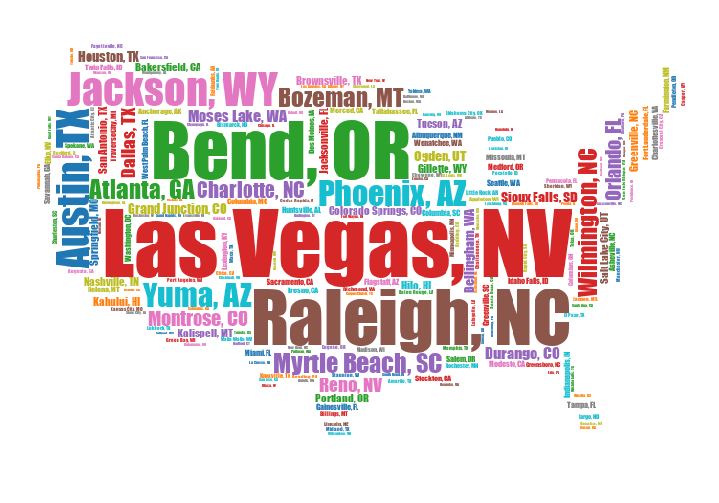

In [63]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

#Convert all the required text into a single string here 
#and store them in word_string

#you can specify fonts, stopwords, background color and other options
alice_coloring = np.array(Image.open("map1.jpg"))
wordcloud = WordCloud(    
#                         font_path ='System/Library/Fonts/HiraKakuInterface-W2.otf',
                          font_path = 'Library/Fonts/Impact.ttf',
                            stopwords=None,
#                           max_font_size=100, 
#                           min_font_size=40,
                          max_words = 200,
                          background_color="white",
                          colormap="tab10",
                          width=2000,
                          height=2000,
                          mask=alice_coloring
                         ).generate_from_frequencies(ratePopulation)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [15]:
destination_passengers = data.groupby(['Destination City']).sum().sort_values('Passengers', ascending=False)


In [16]:
destination_flights = data.groupby(['Destination City']).sum().sort_values('Flights', ascending=False)


In [17]:
origin_passengers = data.groupby(['Origin City']).sum().sort_values('Origin Population', ascending=False)

In [19]:
destination_list = destination_passengers.index.get_level_values(0).tolist()

In [22]:
origin_list = origin_passengers.index.get_level_values(0).tolist()

In [10]:
passengers_list = list(destination_passengers['Passengers'].values)
passengers_list
len(passengers_list)

547

In [24]:
passengers_list_origin = list(origin_passengers['Passengers'].values)
passengers_list_origin
len(passengers_list_origin)

535

In [20]:
words = dict(zip(destination_list,passengers_list))

In [25]:
word = dict(zip(origin_list,passengers_list_origin))

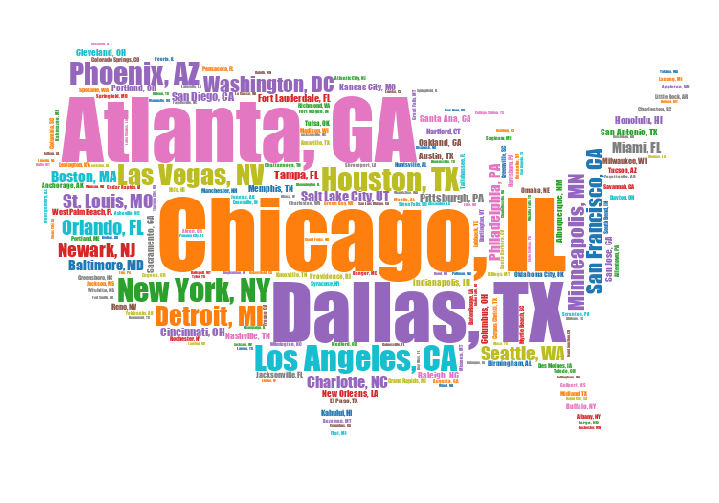

In [26]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

#Convert all the required text into a single string here 
#and store them in word_string

#you can specify fonts, stopwords, background color and other options
alice_coloring = np.array(Image.open("map1.jpg"))
wordcloud = WordCloud(    
#                         font_path ='System/Library/Fonts/HiraKakuInterface-W2.otf',
                          font_path = 'Library/Fonts/Impact.ttf',
                            stopwords=None,
#                           max_font_size=100, 
#                           min_font_size=40,
                          max_words = 200,
                          background_color="white",
                          colormap="tab10",
                          width=2000,
                          height=2000,
                          mask=alice_coloring
                         ).generate_from_frequencies(words)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

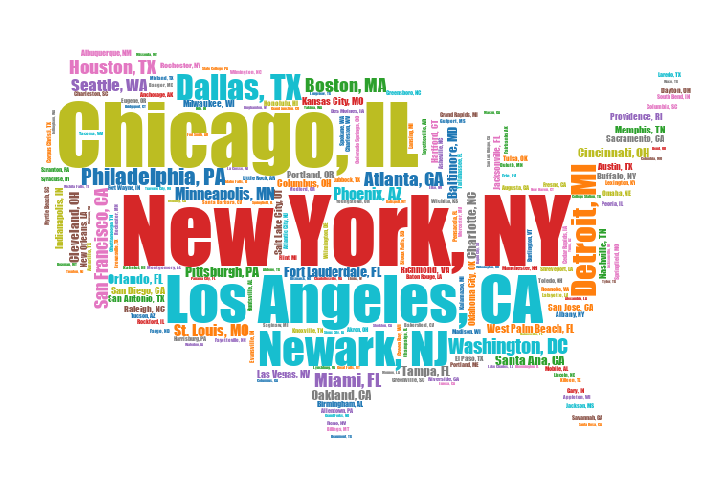

In [29]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

#Convert all the required text into a single string here 
#and store them in word_string

#you can specify fonts, stopwords, background color and other options
alice_coloring = np.array(Image.open("map1.jpg"))
wordcloud = WordCloud(    
#                         font_path ='System/Library/Fonts/HiraKakuInterface-W2.otf',
                          font_path = 'Library/Fonts/Impact.ttf',
                            stopwords=None,
#                           max_font_size=100, 
#                           min_font_size=40,
                          max_words = 200,
                          background_color="white",
                          colormap="tab10",
                          width=2000,
                          height=2000,
                          mask=alice_coloring
                         ).generate_from_frequencies(word)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()